# Analyse des biais dans les métadonnées et pré-processing
Dans ce notebook, nous effectuons le prétraitement des données médicales en vue d’une analyse et d’une modélisation ultérieures. L’ensemble de données utilisé : "ajout1.csv" (55411 lignes et 12 colones) et contient des informations cliniques sur 15000 patients.

L'objectif du projet final est de déterminer si un patient est malade et, si oui, d’identifier la maladie spécifique. Toutefois, cette première étape se concentre uniquement sur le nettoyage et la préparation des données afin d'assurer une base de travail fiable pour les futurs modèles de machine learning.

Les étapes principales de ce prétraitement incluent :
- D'explorer les métadonnées associées aux images.
- D'identifier des biais potentiels (biais liés à l'âge, au genre, etc.).
- D'appliquer une méthode de pré-processing pour réduire ces biais.
- De tirer des premières conclusions sur l'impact du pré-processing.

Un bon prétraitement est essentiel pour garantir la robustesse et la précision des modèles prédictifs qui seront entraînés par la suite.

## 1. Chargement, renommage et nettoyage initial du dataset

Nous chargeons le fichier CSV, renommons les colonnes mal formatées et supprimons la colonne inutile.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Charger les données
file_path = "ajout1.csv"
df = pd.read_csv(file_path)

In [3]:
print("Affichage des 10 premières lignes du dataset initial:")
display(df.head(10))

Affichage des 10 premières lignes du dataset initial:


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000006_000.png,No Finding,0,6,81,M,PA,2500,2048,0.168,0.168,NaN
1,00000007_000.png,No Finding,0,7,82,M,PA,2500,2048,0.168,0.168,NaN
2,00000008_000.png,Cardiomegaly,0,8,69,F,PA,2048,2500,0.171,0.171,NaN
3,00000008_001.png,No Finding,1,8,70,F,PA,2048,2500,0.171,0.171,NaN
4,00000008_002.png,Nodule,2,8,73,F,PA,2048,2500,0.168,0.168,NaN
5,00000012_000.png,Effusion|Mass,0,12,76,M,PA,2992,2991,0.143,0.143,NaN
6,00000015_000.png,No Finding,0,15,70,M,AP,2500,2048,0.168,0.168,NaN
7,00000016_000.png,No Finding,0,16,71,M,PA,2992,2991,0.143,0.143,NaN
8,00000019_000.png,Atelectasis|Effusion|Pleural_Thickening,0,19,66,M,PA,2992,2991,0.143,0.143,NaN
9,00000020_000.png,Pleural_Thickening,0,20,53,M,PA,2978,2991,0.143,0.143,NaN


In [4]:
print(df.dtypes)


Image Index                     object
Finding Labels                  object
Follow-up #                      int64
Patient ID                       int64
Patient Age                      int64
Patient Gender                  object
View Position                   object
OriginalImage[Width              int64
Height]                          int64
OriginalImagePixelSpacing[x    float64
y]                             float64
Unnamed: 11                    float64
dtype: object


###	Colonnes principales :
-	**Image Index** : Nom du fichier image.
-	**Finding Labels** : Libellé(s) des diagnostics (ex. « No Finding », « Cardiomegaly », etc.).
-	**Follow-up #** : Numéro de suivi du patient.
-	**Patient ID** : Identifiant unique du patient.
-	**Patient Age** : Âge du patient.
-	**Patient Gender** : Sexe du patient (M/F).
-	**View Position** : Position de prise de vue 
-	**Image Width et Image Height** : Dimensions de l’image (en pixels).
-	**PixelSpacing_X et PixelSpacing_Y** : Espacement en pixels de l’image.


In [5]:
# Renommage des colonnes mal formatées
df_init = df.rename(columns={
    "OriginalImage[Width": "Image_Width",
    "Height]": "Image_Height",
    "OriginalImagePixelSpacing[x": "PixelSpacing_X",
    "y]": "PixelSpacing_Y"
})

In [6]:

un=df_init['Unnamed: 11'].describe()
unn=pd.DataFrame({
    "Unnamed: 11": un
})
display(unn)

,Unnamed: 11
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [7]:
df_init['Unnamed: 11'].isna().all()

np.True_

Toute la colonne Unnamed: 11 ne contient que des Nan, cette colonne est donc inutile pour notre étude

In [8]:
# Suppression de la colonne inutile
df_init = df_init.drop(columns=["Unnamed: 11"], errors='ignore')
df_init

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,Image_Width,Image_Height,PixelSpacing_X,PixelSpacing_Y
0,00000006_000.png,No Finding,0,6,81,M,PA,2500,2048,0.168000,0.168000
1,00000007_000.png,No Finding,0,7,82,M,PA,2500,2048,0.168000,0.168000
2,00000008_000.png,Cardiomegaly,0,8,69,F,PA,2048,2500,0.171000,0.171000
3,00000008_001.png,No Finding,1,8,70,F,PA,2048,2500,0.171000,0.171000
4,00000008_002.png,Nodule,2,8,73,F,PA,2048,2500,0.168000,0.168000
...,...,...,...,...,...,...,...,...,...,...,...
55406,00030790_000.png,No Finding,0,30790,47,F,PA,2021,2021,0.194311,0.194311
55407,00030794_000.png,No Finding,0,30794,38,F,PA,2021,2021,0.194311,0.194311
55408,00030796_000.png,No Finding,0,30796,44,M,PA,2021,2021,0.194311,0.194311
55409,00030797_000.png,No Finding,0,30797,24,M,PA,2021,2021,0.194311,0.194311


## 2. Analyse des métadonnées et identification des biais

Nous examinons la distribution des âges, la répartition des genres et la distribution des diagnostics.

In [9]:
# Analyse des âges
# Conversion de la colonne "Patient Age" en numérique
df_init['Patient Age'] = pd.to_numeric(df_init['Patient Age'], errors='coerce')

### Analyse Univariée

Nous analysons individuellement chaque variable importante afin d'observer leurs distributions.


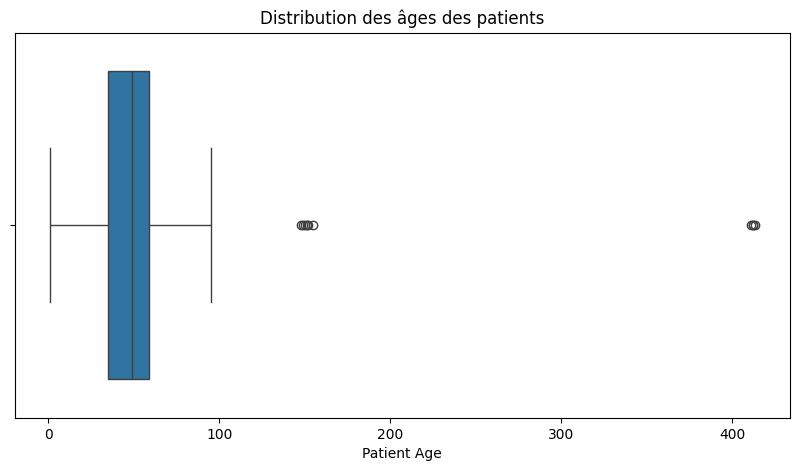

Statistiques sur les âges :


,Apres Pré-processing
count,55411.000000
mean,46.880078
std,16.906511
min,1.000000
25%,35.000000
50%,49.000000
75%,59.000000
max,413.000000


,Apres Pré-processing
Patient Age,
58,1680
52,1463
55,1447
56,1418
46,1361
...,...
149,1
151,1
411,1


In [10]:
# Analyse de la distribution des âges
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_init["Patient Age"])
plt.title("Distribution des âges des patients")
plt.show()
print("Statistiques sur les âges :")
# le nombre d'individu de chaque age
age_des = df_init['Patient Age'].describe()
age_desc = pd.DataFrame({
    "Apres Pré-processing": age_des
})
display(age_desc)
age_stat = df_init['Patient Age'].value_counts()
age_stats = pd.DataFrame({
    "Apres Pré-processing": age_stat
})
display(age_stats)

/tmp/ipykernel_42267/447122891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_init["Patient Gender"], palette = "Set2")


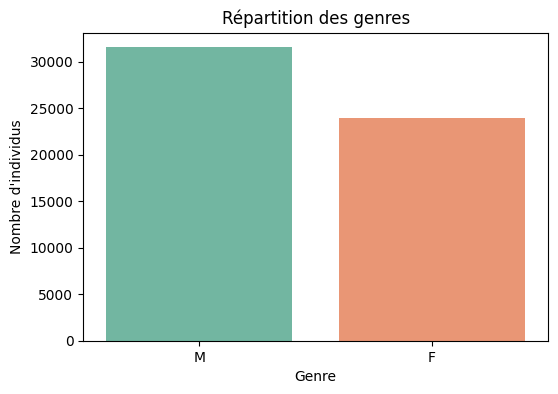

Nombre d'individus par genre :


,Avant Pré-processing
count,55411
unique,637
top,No Finding
freq,29678


,Avant Pré-processing
Patient Gender,
M,31525
F,23886


In [11]:
# Analyse de la répartition des genres
plt.figure(figsize=(6, 4))
sns.countplot(x=df_init["Patient Gender"], palette = "Set2")
plt.title("Répartition des genres")
plt.xlabel("Genre")
plt.ylabel("Nombre d'individus")
plt.show()
print("Nombre d'individus par genre :")
gend_describe=df_init['Finding Labels'].describe()
gend_des=pd.DataFrame({
    "Avant Pré-processing": gend_describe
})
display(gend_des)
# Calcul des statistiques descriptives  après pré-processing
gender_stat1 = df_init["Patient Gender"].value_counts()

# Créer un DataFrame avec les deux
gender_stats = pd.DataFrame({
    "Avant Pré-processing": gender_stat1
})


# Affichage du tableau comparatif
display(gender_stats)


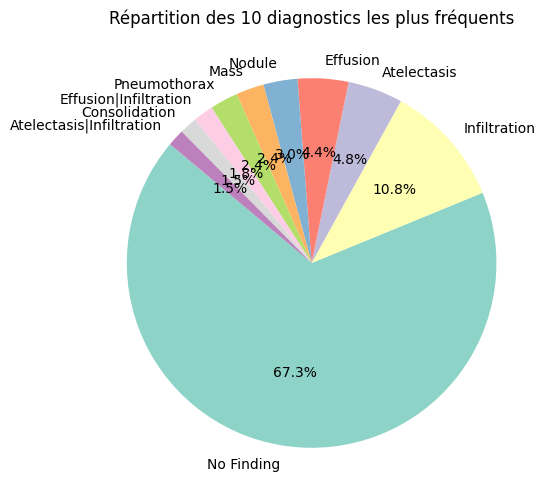

,AVANT Pré-processing
count,55411
unique,637
top,No Finding
freq,29678


,AVANT Pré-processing
Finding Labels,
No Finding,29678
Infiltration,4751
Atelectasis,2120
Effusion,1957
Nodule,1314
...,...
Consolidation|Nodule|Pneumonia,1
Atelectasis|Effusion|Emphysema|Pleural_Thickening|Pneumothorax,1
Consolidation|Pneumonia|Mass,1


In [12]:
top_diagnoses = df_init['Finding Labels'].value_counts().nlargest(10)  # Select top 10
plt.figure(figsize=(10, 6))
plt.pie(top_diagnoses, labels=top_diagnoses.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Répartition des 10 diagnostics les plus fréquents")
plt.show()
diag_des = df_init['Finding Labels'].describe()
diag_desc = pd.DataFrame({
    "AVANT Pré-processing": diag_des
})
display(diag_desc)

diag_stat = df_init['Finding Labels'].value_counts()
diag_stats = pd.DataFrame({
    "AVANT Pré-processing": diag_stat
})
display(diag_stats)


## Remarques sur la qualité des données et biais potentiels
###	Valeurs aberrantes dans l’âge :
o	Problème détecté : Plusieurs âges sont irréalistes (ex. 411, 412, 413 ans), probablement dus à des erreurs de saisie. Ces enregistrements doivent être exclus ou corrigés pour éviter des biais dans l’analyse.
###	Déséquilibre des classes dans les diagnostics :
o	Problème détecté : La majorité des patients sont classés comme "No Finding", ce qui peut biaiser l’apprentissage du modèle. Un modèle de classification pourrait avoir des performances réduites sur des pathologies moins fréquentes. Il est nécessaire de gérer ce déséquilibre (sous-échantillonnage dans ce cas)
###	Répartition inégale des sexes :
o	Problème détecté : Si un sexe est surreprésenté dans le dataset, cela pourrait entraîner un biais dans les prédictions.


## 3. Pré-processing pour réduire les biais

Nous allons appliquer deux techniques :
- Correction des âges aberrants (en filtrant les âges > 100).
- Correction du biais lié au genre par equilibrage des poids afin de ne pas perdre en information.
- Correction du biais lié à la présence majoritaire du "no-finding" diagnosis

In [25]:
# Nettoyage des âges aberrants (on considère qu'un âge > 100 ans est irréaliste)
df_cleaned = df_init[df_init["Patient Age"] <= 100]

In [26]:
print("Taille du dataset avant nettoyage :", len(df_init))
print("Taille du dataset après nettoyage des âges aberrants :", len(df_cleaned))

Taille du dataset avant nettoyage : 55411
Taille du dataset après nettoyage des âges aberrants : 55401


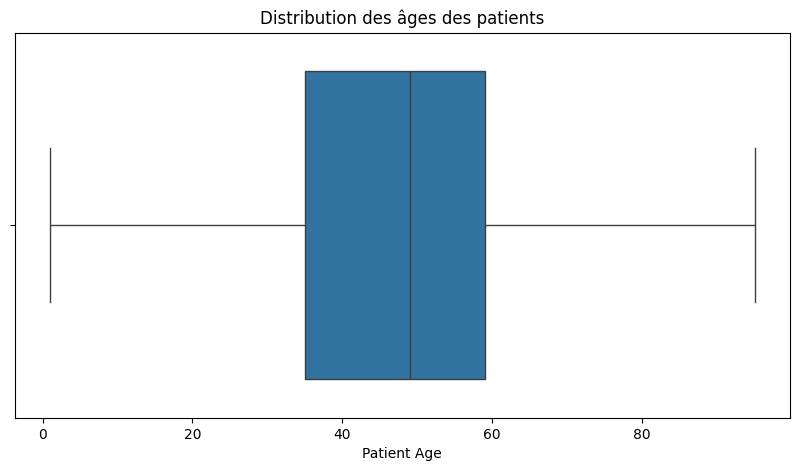

Statistiques sur les âges :


,Apres Pré-processing
count,55401.000000
mean,46.842458
std,16.585653
min,1.000000
25%,35.000000
50%,49.000000
75%,59.000000
max,95.000000


,Apres Pré-processing
Patient Age,
58,1680
52,1463
55,1447
56,1418
46,1361
...,...
89,6
94,5
91,4


In [27]:
# Distribution des âges des patients
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned["Patient Age"])
plt.title("Distribution des âges des patients")
plt.show()
print("Statistiques sur les âges :")
# pour avoir le compte du nombre d'individus pour chaque age, il suffit de changer describe par value_counts, comme ca on aura un tableau affichant 
# le nombre d'individu de chaque age
age_des = df_cleaned['Patient Age'].describe()
age_desc = pd.DataFrame({
    "Apres Pré-processing": age_des
})
display(age_desc)
age_stat = df_cleaned['Patient Age'].value_counts()
age_stats = pd.DataFrame({
    "Apres Pré-processing": age_stat
})
display(age_stats)

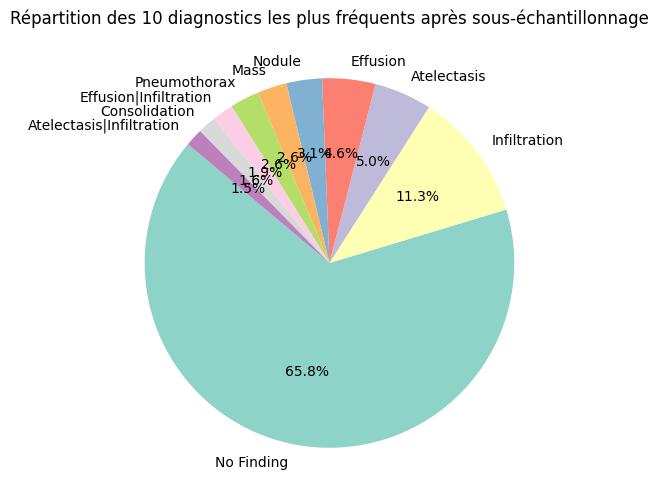

Répartition des classes après sous-échantillonnage de 'No Finding':


,Apres Pré-processing
count,53429
unique,637
top,No Finding
freq,27700


,Apres Pré-processing
Finding Labels,
No Finding,27700
Infiltration,4750
Atelectasis,2120
Effusion,1957
Nodule,1314
...,...
Consolidation|Nodule|Pneumonia,1
Atelectasis|Effusion|Emphysema|Pleural_Thickening|Pneumothorax,1
Consolidation|Pneumonia|Mass,1


In [28]:
# Taille totale du dataset
total_size = df_cleaned.shape[0]

# Sous-échantillonnage de la classe "No Finding" à 50% du dataset
no_finding_size = total_size // 2

# Sélectionner les exemples de la classe "No Finding" à la taille souhaitée
no_finding_samples = df_cleaned[df_cleaned['Finding Labels'] == 'No Finding'].sample(no_finding_size, random_state=42)

# Sélectionner tous les autres diagnostics (qui ne sont pas "No Finding")
other_diagnostics_samples = df_cleaned[df_cleaned['Finding Labels'] != 'No Finding']

# Fusionner les deux dataframes pour obtenir le dataset sous-échantillonné
df_intermediate = pd.concat([no_finding_samples, other_diagnostics_samples])

# Calcul des 10 diagnostics les plus fréquents après sous-échantillonnage
top_diagnoses_before = df_intermediate['Finding Labels'].value_counts().nlargest(10)

# Affichage du graphique des 10 diagnostics les plus fréquents
plt.figure(figsize=(12, 6))
plt.pie(top_diagnoses_before, labels=top_diagnoses_before.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Répartition des 10 diagnostics les plus fréquents après sous-échantillonnage")
plt.show()

# Affichage de la répartition des classes après sous-échantillonnage
print("Répartition des classes après sous-échantillonnage de 'No Finding':")

# Statistiques descriptives sur les diagnostics après sous-échantillonnage
diag_describe = df_intermediate['Finding Labels'].describe()
diag_des = pd.DataFrame({
    "Apres Pré-processing": diag_describe
})
display(diag_des)

diag_stat = df_intermediate['Finding Labels'].value_counts()
diag_stats = pd.DataFrame({
    "Apres Pré-processing": diag_stat
})
display(diag_stats)

In [29]:
# Identifier le nombre minimum d'individus par genre
min_count = df_intermediate["Patient Gender"].value_counts().min()


In [30]:
df_intermediate=df_cleaned

In [31]:
df_intermediate

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,Image_Width,Image_Height,PixelSpacing_X,PixelSpacing_Y
0,00000006_000.png,No Finding,0,6,81,M,PA,2500,2048,0.168000,0.168000
1,00000007_000.png,No Finding,0,7,82,M,PA,2500,2048,0.168000,0.168000
2,00000008_000.png,Cardiomegaly,0,8,69,F,PA,2048,2500,0.171000,0.171000
3,00000008_001.png,No Finding,1,8,70,F,PA,2048,2500,0.171000,0.171000
4,00000008_002.png,Nodule,2,8,73,F,PA,2048,2500,0.168000,0.168000
...,...,...,...,...,...,...,...,...,...,...,...
55406,00030790_000.png,No Finding,0,30790,47,F,PA,2021,2021,0.194311,0.194311
55407,00030794_000.png,No Finding,0,30794,38,F,PA,2021,2021,0.194311,0.194311
55408,00030796_000.png,No Finding,0,30796,44,M,PA,2021,2021,0.194311,0.194311
55409,00030797_000.png,No Finding,0,30797,24,M,PA,2021,2021,0.194311,0.194311


In [32]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing
from sklearn.preprocessing import LabelEncoder

# Encoder la colonne 'Patient Gender' en numérique
le = LabelEncoder()
df_cleaned['Patient Gender'] = le.fit_transform(df_cleaned['Patient Gender'])

# Filtrer le DataFrame pour ne conserver que les colonnes nécessaires
df_genre = df_cleaned[['Finding Labels', 'Patient Gender']].copy()

# Convertir le dataset en format AIF360, en prenant en compte uniquement 'Patient Gender' comme attribut protégé
dataset_aif = StandardDataset(df_genre, 
                              label_name="Finding Labels",  # 'Finding Labels' est le label à prédire
                              favorable_classes=['No Finding'],  # '1' est la classe favorable pour 'Finding Labels'
                              protected_attribute_names=["Patient Gender"],  # Le genre est l'attribut protégé
                              privileged_classes=[[1]])  # Le genre privilégié est '1' (pour 'Male')

# Calculer les métriques de biais avant correction
metric = BinaryLabelDatasetMetric(dataset_aif, 
                                  privileged_groups=[{"Patient Gender": 1}], 
                                  unprivileged_groups=[{"Patient Gender": 0}])
print("Disparate Impact before correction:", metric.disparate_impact())

# Appliquer la méthode de rééchantillonnage pour corriger le biais en fonction du genre uniquement
rw = Reweighing(unprivileged_groups=[{"Patient Gender": 0}], 
                privileged_groups=[{"Patient Gender": 1}])
dataset_transf = rw.fit_transform(dataset_aif)

# Calculer les métriques de biais après correction
metric_transf = BinaryLabelDatasetMetric(dataset_transf, 
                                         privileged_groups=[{"Patient Gender": 1}], 
                                         unprivileged_groups=[{"Patient Gender": 0}])
print("Disparate Impact after correction:", metric_transf.disparate_impact())

# Remplacer les poids dans le DataFrame original en fonction du genre uniquement
df_intermediate["sample_weight"] = dataset_transf.instance_weights

# Rétablir le 'Patient Gender' avec les labels originaux en utilisant inverse_transform
df_intermediate["Patient Gender"] = le.inverse_transform(df_intermediate["Patient Gender"])

# Afficher le DataFrame mis à jour
print(df_intermediate.head())

/tmp/ipykernel_42267/739026573.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Patient Gender'] = le.fit_transform(df_cleaned['Patient Gender'])


Disparate Impact before correction: 1.0141206937047333
Disparate Impact after correction: 0.9999999999999993
        Image Index Finding Labels  Follow-up #  Patient ID  Patient Age  \
0  00000006_000.png     No Finding            0           6           81   
1  00000007_000.png     No Finding            0           7           82   
2  00000008_000.png   Cardiomegaly            0           8           69   
3  00000008_001.png     No Finding            1           8           70   
4  00000008_002.png         Nodule            2           8           73   

  Patient Gender View Position  Image_Width  Image_Height  PixelSpacing_X  \
0              M            PA         2500          2048           0.168   
1              M            PA         2500          2048           0.168   
2              F            PA         2048          2500           0.171   
3              F            PA         2048          2500           0.171   
4              F            PA         2048      

/tmp/ipykernel_42267/739026573.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_intermediate["sample_weight"] = dataset_transf.instance_weights
/tmp/ipykernel_42267/739026573.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_intermediate["Patient Gender"] = le.inverse_transform(df_intermediate["Patient Gender"])


### La cellule ci dessous contient la tentative d'équilibrage des poinds des différents diagnostics

In [33]:
'''
# Encoder la colonne 'Finding Labels' en numérique
le_finding = LabelEncoder()
df_cleaned['Finding Labels'] = le_finding.fit_transform(df_cleaned['Finding Labels'])

# Filtrer le DataFrame pour ne conserver que les colonnes nécessaires
df_finding = df_cleaned[['Finding Labels', 'Patient Gender']].copy()

# Convertir le dataset en format AIF360
dataset_aif_finding = StandardDataset(df_finding, 
                                      label_name="Finding Labels", 
                                      favorable_classes=[0],  # "No Finding" (0) est la classe favorable
                                      protected_attribute_names=["Patient Gender"], 
                                      privileged_classes=[[1]])  # 1 signifie "Patient Gender" est masculin

# Calculer les métriques de biais avant correction
metric_finding = BinaryLabelDatasetMetric(dataset_aif_finding, 
                                          privileged_groups=[{"Patient Gender": 1}], 
                                          unprivileged_groups=[{"Patient Gender": 0}])
print("Disparate Impact before correction:", metric_finding.disparate_impact())

# Appliquer la méthode de rééchantillonnage pour corriger le biais
rw_finding = Reweighing(unprivileged_groups=[{"Patient Gender": 0}], 
                        privileged_groups=[{"Patient Gender": 1}])
dataset_transf_finding = rw_finding.fit_transform(dataset_aif_finding)

# Calculer les métriques de biais après correction
metric_transf_finding = BinaryLabelDatasetMetric(dataset_transf_finding, 
                                                 privileged_groups=[{"Patient Gender": 1}], 
                                                 unprivileged_groups=[{"Patient Gender": 0}])
print("Disparate Impact after correction:", metric_transf_finding.disparate_impact())

# Remplacer les poids dans le DataFrame original
df_intermediate["sample_weight_finding"] = dataset_transf_finding.instance_weights

# Afficher le DataFrame mis à jour
print(df_intermediate.head())
'''


'\n# Encoder la colonne \'Finding Labels\' en numérique\nle_finding = LabelEncoder()\ndf_cleaned[\'Finding Labels\'] = le_finding.fit_transform(df_cleaned[\'Finding Labels\'])\n\n# Filtrer le DataFrame pour ne conserver que les colonnes nécessaires\ndf_finding = df_cleaned[[\'Finding Labels\', \'Patient Gender\']].copy()\n\n# Convertir le dataset en format AIF360\ndataset_aif_finding = StandardDataset(df_finding, \n                                      label_name="Finding Labels", \n                                      favorable_classes=[0],  # "No Finding" (0) est la classe favorable\n                                      protected_attribute_names=["Patient Gender"], \n                                      privileged_classes=[[1]])  # 1 signifie "Patient Gender" est masculin\n\n# Calculer les métriques de biais avant correction\nmetric_finding = BinaryLabelDatasetMetric(dataset_aif_finding, \n                                          privileged_groups=[{"Patient Gender": 1}], \n     

In [34]:
df_intermediate

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,Image_Width,Image_Height,PixelSpacing_X,PixelSpacing_Y,sample_weight
0,00000006_000.png,No Finding,0,6,81,M,PA,2500,2048,0.168000,0.168000,1.006087
1,00000007_000.png,No Finding,0,7,82,M,PA,2500,2048,0.168000,0.168000,1.006087
2,00000008_000.png,Cardiomegaly,0,8,69,F,PA,2048,2500,0.171000,0.171000,1.009294
3,00000008_001.png,No Finding,1,8,70,F,PA,2048,2500,0.171000,0.171000,0.992078
4,00000008_002.png,Nodule,2,8,73,F,PA,2048,2500,0.168000,0.168000,1.009294
...,...,...,...,...,...,...,...,...,...,...,...,...
55406,00030790_000.png,No Finding,0,30790,47,F,PA,2021,2021,0.194311,0.194311,0.992078
55407,00030794_000.png,No Finding,0,30794,38,F,PA,2021,2021,0.194311,0.194311,0.992078
55408,00030796_000.png,No Finding,0,30796,44,M,PA,2021,2021,0.194311,0.194311,1.006087
55409,00030797_000.png,No Finding,0,30797,24,M,PA,2021,2021,0.194311,0.194311,1.006087


In [35]:
df_final=df_intermediate

## Comparaison des distributions de données avant et après pré-processing

/tmp/ipykernel_42267/1768894702.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Patient Gender"], palette="Set2", ax=axes[0])
/tmp/ipykernel_42267/1768894702.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_final["Patient Gender"], palette="Set2", ax=axes[1])


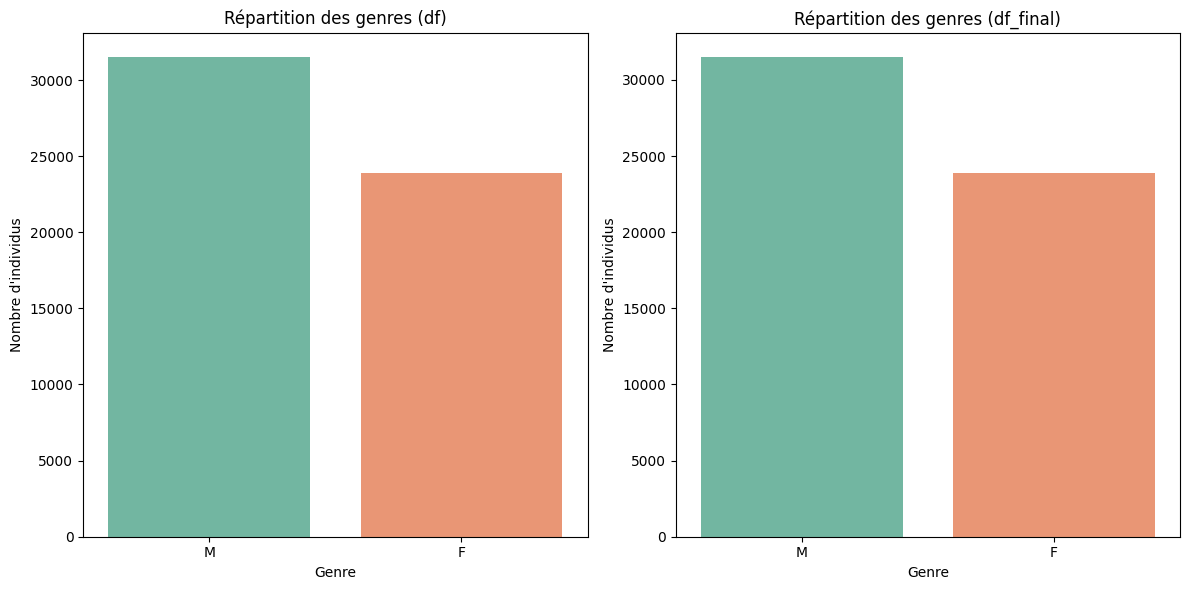

,Avant Pré-processing,Après Pré-processing
count,55411,55401
unique,2,2
top,M,M
freq,31525,31519


In [36]:
# Créer une figure avec deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Premier countplot pour df_balanced
sns.countplot(x=df["Patient Gender"], palette="Set2", ax=axes[0])
axes[0].set_title("Répartition des genres (df)")
axes[0].set_xlabel("Genre")
axes[0].set_ylabel("Nombre d'individus")

# Premier countplot pour df_final_balanced
sns.countplot(x=df_final["Patient Gender"], palette="Set2", ax=axes[1])
axes[1].set_title("Répartition des genres (df_final)")
axes[1].set_xlabel("Genre")
axes[1].set_ylabel("Nombre d'individus")

# Ajuster la disposition pour éviter le chevauchement
plt.tight_layout()
plt.show()

# Calcul des statistiques descriptives avant et après pré-processing
gender_stats_before = df["Patient Gender"].describe()
gender_stats_after = df_final["Patient Gender"].describe()

# Créer un DataFrame pour les afficher côte à côte
gender_stats_comparative = pd.DataFrame({
    "Avant Pré-processing": gender_stats_before,
    "Après Pré-processing": gender_stats_after
})

# Affichage du tableau comparatif
display(gender_stats_comparative)



In [37]:
df_final

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,Image_Width,Image_Height,PixelSpacing_X,PixelSpacing_Y,sample_weight
0,00000006_000.png,No Finding,0,6,81,M,PA,2500,2048,0.168000,0.168000,1.006087
1,00000007_000.png,No Finding,0,7,82,M,PA,2500,2048,0.168000,0.168000,1.006087
2,00000008_000.png,Cardiomegaly,0,8,69,F,PA,2048,2500,0.171000,0.171000,1.009294
3,00000008_001.png,No Finding,1,8,70,F,PA,2048,2500,0.171000,0.171000,0.992078
4,00000008_002.png,Nodule,2,8,73,F,PA,2048,2500,0.168000,0.168000,1.009294
...,...,...,...,...,...,...,...,...,...,...,...,...
55406,00030790_000.png,No Finding,0,30790,47,F,PA,2021,2021,0.194311,0.194311,0.992078
55407,00030794_000.png,No Finding,0,30794,38,F,PA,2021,2021,0.194311,0.194311,0.992078
55408,00030796_000.png,No Finding,0,30796,44,M,PA,2021,2021,0.194311,0.194311,1.006087
55409,00030797_000.png,No Finding,0,30797,24,M,PA,2021,2021,0.194311,0.194311,1.006087


## Comparaison de la distribution des âges avant et après pré-processing

/tmp/ipykernel_42267/2971980623.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Patient Age"], label="Avant pré-processing", shade=True)
/tmp/ipykernel_42267/2971980623.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_final["Patient Age"], label="Après pré-processing", shade=True)


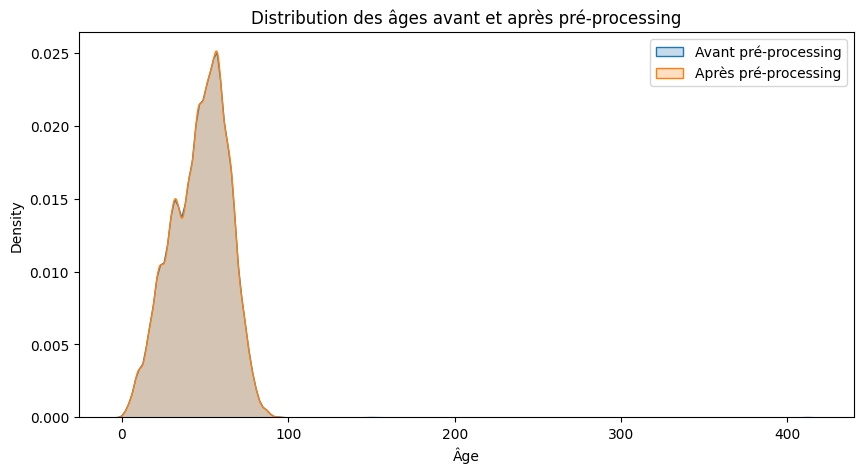

,Avant Pré-processing,Après Pré-processing
count,55411.000000,55401.000000
mean,46.880078,46.842458
std,16.906511,16.585653
min,1.000000,1.000000
25%,35.000000,35.000000
50%,49.000000,49.000000
75%,59.000000,59.000000
max,413.000000,95.000000


In [38]:
# Comparaison de la distribution des âges
plt.figure(figsize=(10, 5))
sns.kdeplot(df["Patient Age"], label="Avant pré-processing", shade=True)
sns.kdeplot(df_final["Patient Age"], label="Après pré-processing", shade=True)
plt.title("Distribution des âges avant et après pré-processing")
plt.xlabel("Âge")
plt.legend()
plt.show()
# Calcul des statistiques descriptives avant et après pré-processing
age_stats_before = df["Patient Age"].describe()
age_stats_after = df_final["Patient Age"].describe()

# Créer un DataFrame pour les afficher côte à côte
age_stats_comparative = pd.DataFrame({
    "Avant Pré-processing": age_stats_before,
    "Après Pré-processing": age_stats_after
})

# Affichage du tableau comparatif
display(age_stats_comparative)


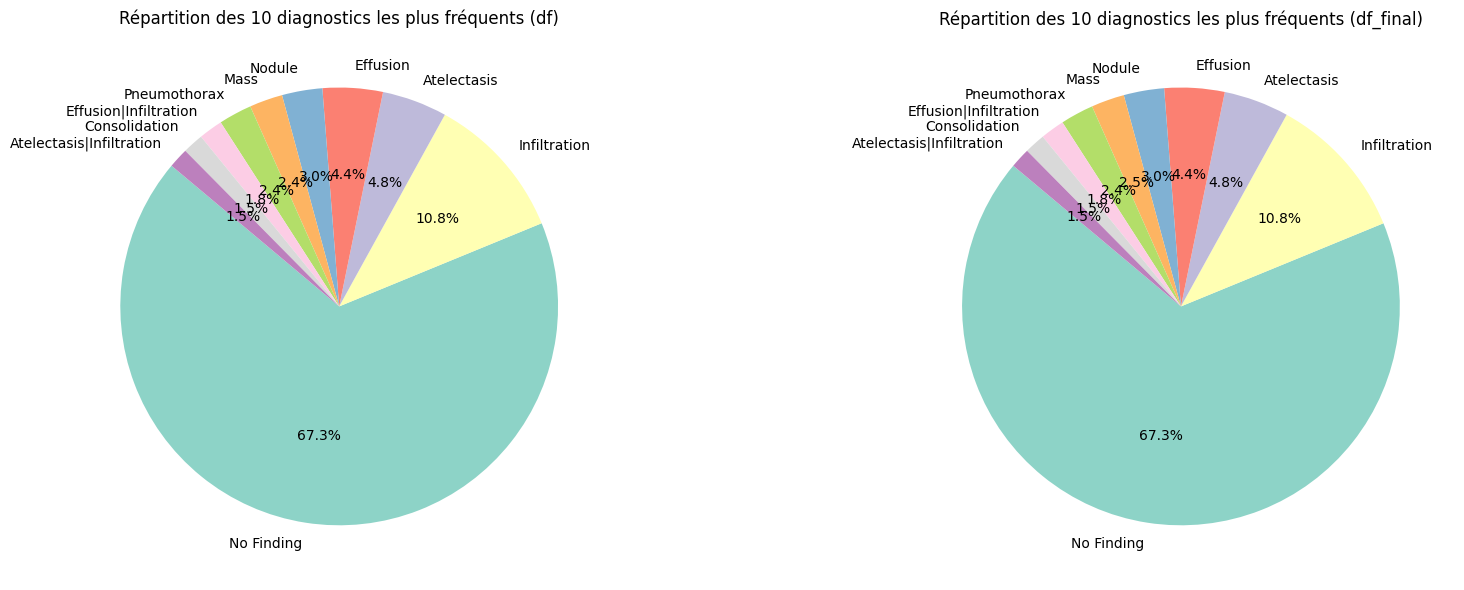

,Avant Pré-processing,Après Pré-processing
count,55411,55401
unique,637,637
top,No Finding,No Finding
freq,29678,29672


In [39]:
# Créer une figure avec deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 1. Premier graphique : Répartition des 10 diagnostics les plus fréquents dans df
top_diagnoses = df['Finding Labels'].value_counts().nlargest(10)  # Sélectionner les 10 premiers
axes[0].pie(top_diagnoses, labels=top_diagnoses.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
axes[0].set_title("Répartition des 10 diagnostics les plus fréquents (df)")

# 2. Deuxième graphique : Répartition des 10 diagnostics les plus fréquents dans df_final
top_diagnoses_final = df_final['Finding Labels'].value_counts().nlargest(10)  # Sélectionner les 10 premiers
axes[1].pie(top_diagnoses_final, labels=top_diagnoses_final.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
axes[1].set_title("Répartition des 10 diagnostics les plus fréquents (df_final)")

# Ajuster l'affichage
plt.tight_layout()
plt.show()
# Calcul des statistiques descriptives avant et après pré-processing
diagnosis_stats_before = df['Finding Labels'].describe()
diagnosis_stats_after = df_final['Finding Labels'].describe()

# Créer un DataFrame pour les afficher côte à côte
diagnosis_stats_comparative = pd.DataFrame({
    "Avant Pré-processing":diagnosis_stats_before,
    "Après Pré-processing": diagnosis_stats_after
})

# Affichage du tableau comparatif
display(diagnosis_stats_comparative)


## Co-occurence des diagnostics avant et après pré-processing

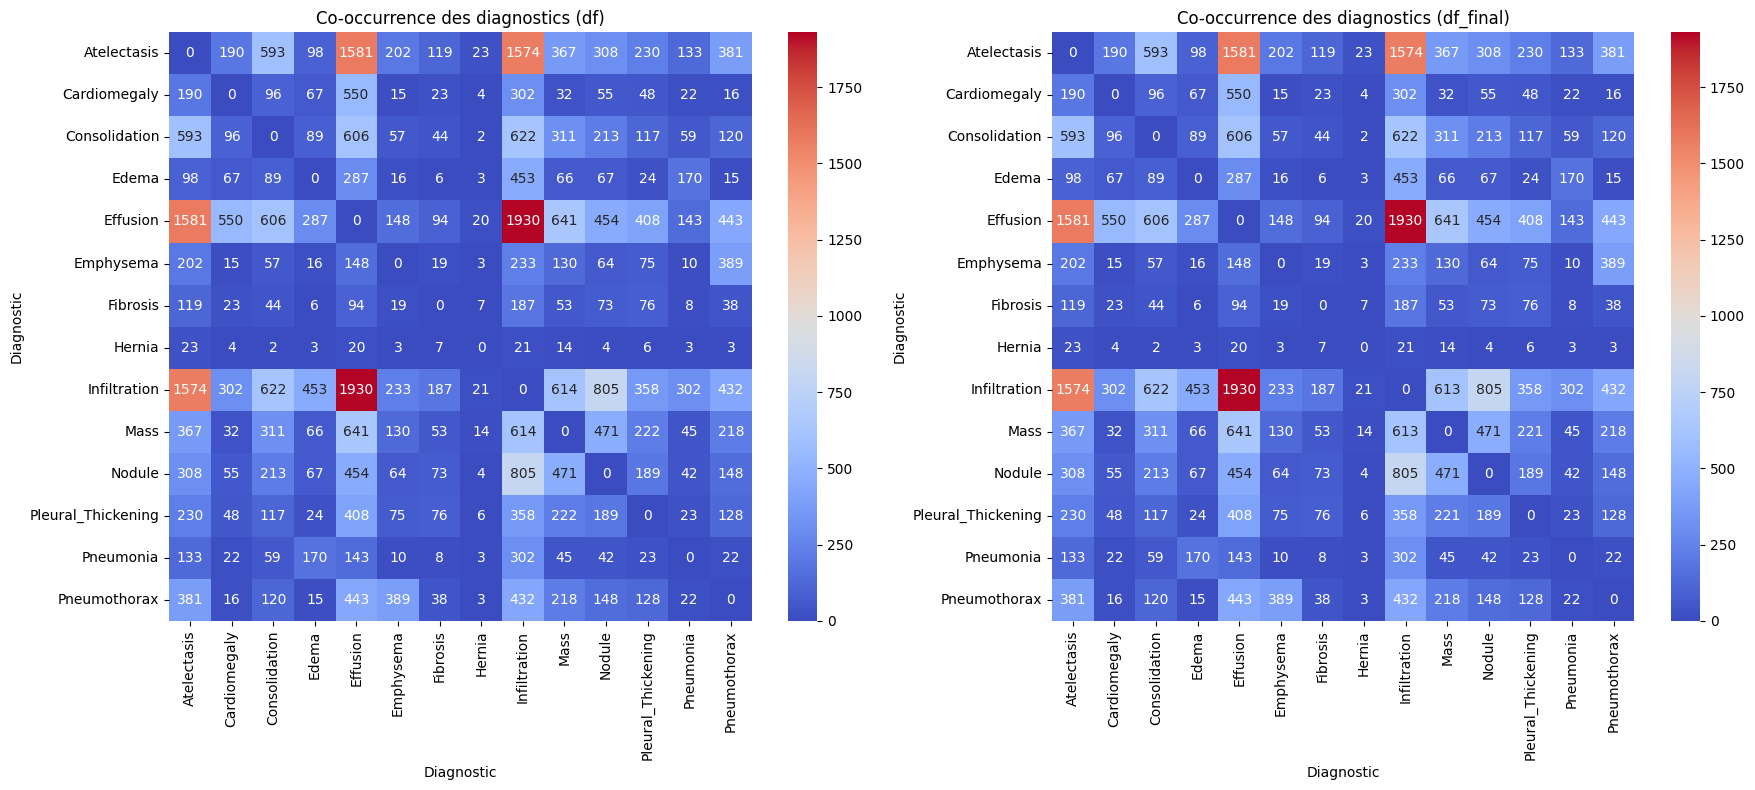

In [40]:
from itertools import combinations
from collections import Counter

# Fonction pour créer une matrice de co-occurrence
def create_co_occurrence_matrix(df):
    # Séparation des diagnostics en colonnes différentes
    diagnosis_sets = df['Finding Labels'].dropna().str.split('|')
    all_pairs = [pair for sublist in diagnosis_sets for pair in combinations(sublist, 2)]
    
    # comptage des co-occurrences
    co_occurrence = pd.DataFrame(Counter(all_pairs).items(), columns=['Pair', 'Count'])
    co_occurrence[['Diag1', 'Diag2']] = pd.DataFrame(co_occurrence['Pair'].tolist(), index=co_occurrence.index)
    
    # Creation d'une table pivot
    pivot_table = co_occurrence.pivot_table(index="Diag1", columns="Diag2", values="Count", fill_value=0)
    
    # Symetrie dans les heatmap
    pivot_table = pivot_table + pivot_table.T
    
    return pivot_table

# Creation de matrice de co_occurence de df et df_final
pivot_table_df = create_co_occurrence_matrix(df)
pivot_table_df_final = create_co_occurrence_matrix(df_final)

# Créer une figure avec deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# première heatmap pour df
sns.heatmap(pivot_table_df, cmap="coolwarm", annot=True, fmt=".0f", ax=axes[0])
axes[0].set_title("Co-occurrence des diagnostics (df)")
axes[0].set_xlabel("Diagnostic")
axes[0].set_ylabel("Diagnostic")

# deuxieme heatmap pour df_final
sns.heatmap(pivot_table_df_final, cmap="coolwarm", annot=True, fmt=".0f", ax=axes[1])
axes[1].set_title("Co-occurrence des diagnostics (df_final)")
axes[1].set_xlabel("Diagnostic")
axes[1].set_ylabel("Diagnostic")

# Ajuster l'affichage
plt.tight_layout()
plt.show()


On constate ici que les deux matrices de co-occurences des maladies sont très semblables. Cela nous donne en effet une indication de conservation de l'information, même après réduction de l'information dans notre dataset.

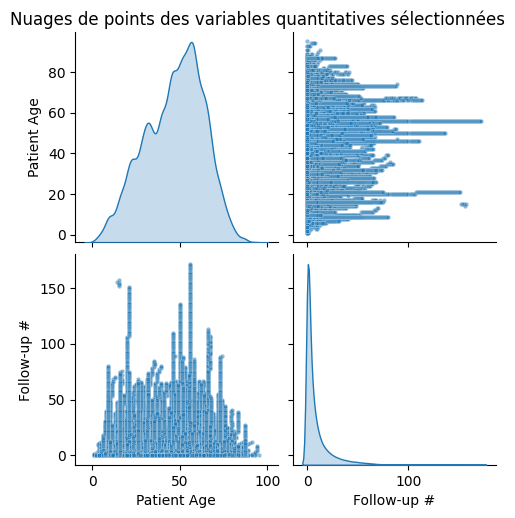

In [41]:
# Liste des colonnes que tu veux sélectionner pour le pairplot
selected_columns = ['Patient Age', 'Follow-up #', 'Finding Labels']  # Remplace par les noms de tes colonnes

# Création du pairplot sur les colonnes sélectionnées
sns.pairplot(df_final[selected_columns], diag_kind='kde', plot_kws={'alpha': 0.5, 's': 10})
plt.suptitle('Nuages de points des variables quantitatives sélectionnées', y=1.02)
plt.show()

## 5. Analyse des relations entre les différentes colonnes du dataset

## Comptage des diagnostics par genre sur le dataset initial et final

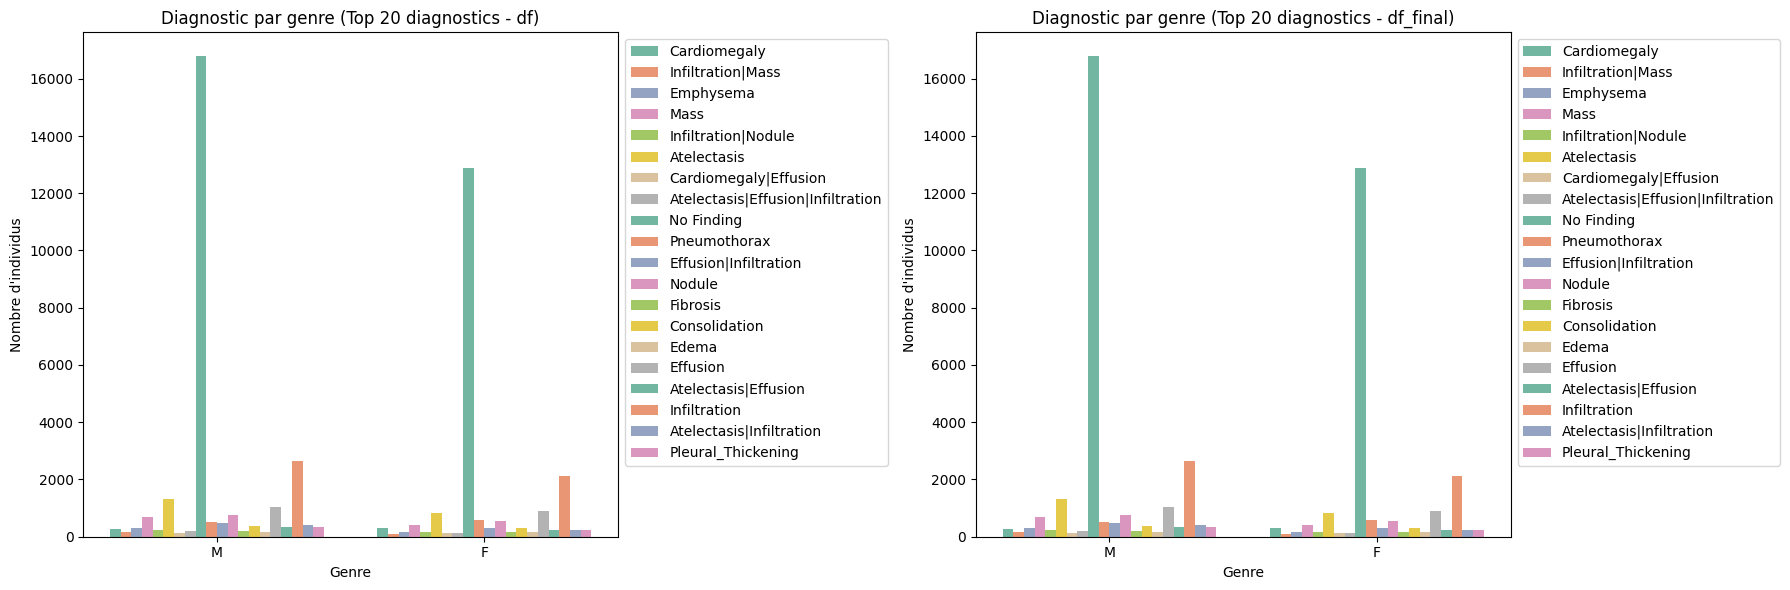

In [42]:
# Compter le nombre d'occurrences des diagnostics
top_diagnostics = df['Finding Labels'].value_counts().head(20).index
# Filtrer le dataframe pour ne garder que les diagnostics les plus fréquents
filtered_df = df[df['Finding Labels'].isin(top_diagnostics)]

# Compter le nombre d'occurrences des diagnostics pour df_final
top_diagnostics_final = df_final['Finding Labels'].value_counts().head(20).index
# Filtrer le dataframe pour ne garder que les diagnostics les plus fréquents
filtered_df_final = df_final[df_final['Finding Labels'].isin(top_diagnostics_final)]

# Assurez-vous que l'ordre des diagnostics soit le même dans df et df_final
common_diagnostics = list(set(top_diagnostics) & set(top_diagnostics_final))

# Créer une figure avec deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Premier countplot pour df
sns.countplot(x=filtered_df['Patient Gender'], hue=filtered_df['Finding Labels'], 
              palette="Set2", ax=axes[0], hue_order=common_diagnostics)
axes[0].set_title("Diagnostic par genre (Top 20 diagnostics - df)")
axes[0].set_xlabel("Genre")
axes[0].set_ylabel("Nombre d'individus")
axes[0].legend(bbox_to_anchor=(1, 1))

# Deuxième countplot pour df_final
sns.countplot(x=filtered_df_final['Patient Gender'], hue=filtered_df_final['Finding Labels'], 
              palette="Set2", ax=axes[1], hue_order=common_diagnostics)
axes[1].set_title("Diagnostic par genre (Top 20 diagnostics - df_final)")
axes[1].set_xlabel("Genre")
axes[1].set_ylabel("Nombre d'individus")
axes[1].legend(bbox_to_anchor=(1, 1))

# Ajuster l'affichage
plt.tight_layout()
plt.show()


On constate que dans le cas du dataset final, les deux histogrames pout homme et femme sont très semblables, ce qui veut dire que ces données présentent un biais moindre quant aux données initiales, ce qui permettra un meilleur entrainement de modèle afin que les prédictions (malade ou non, si oui quelle maladie) soient les plus vraies possible.

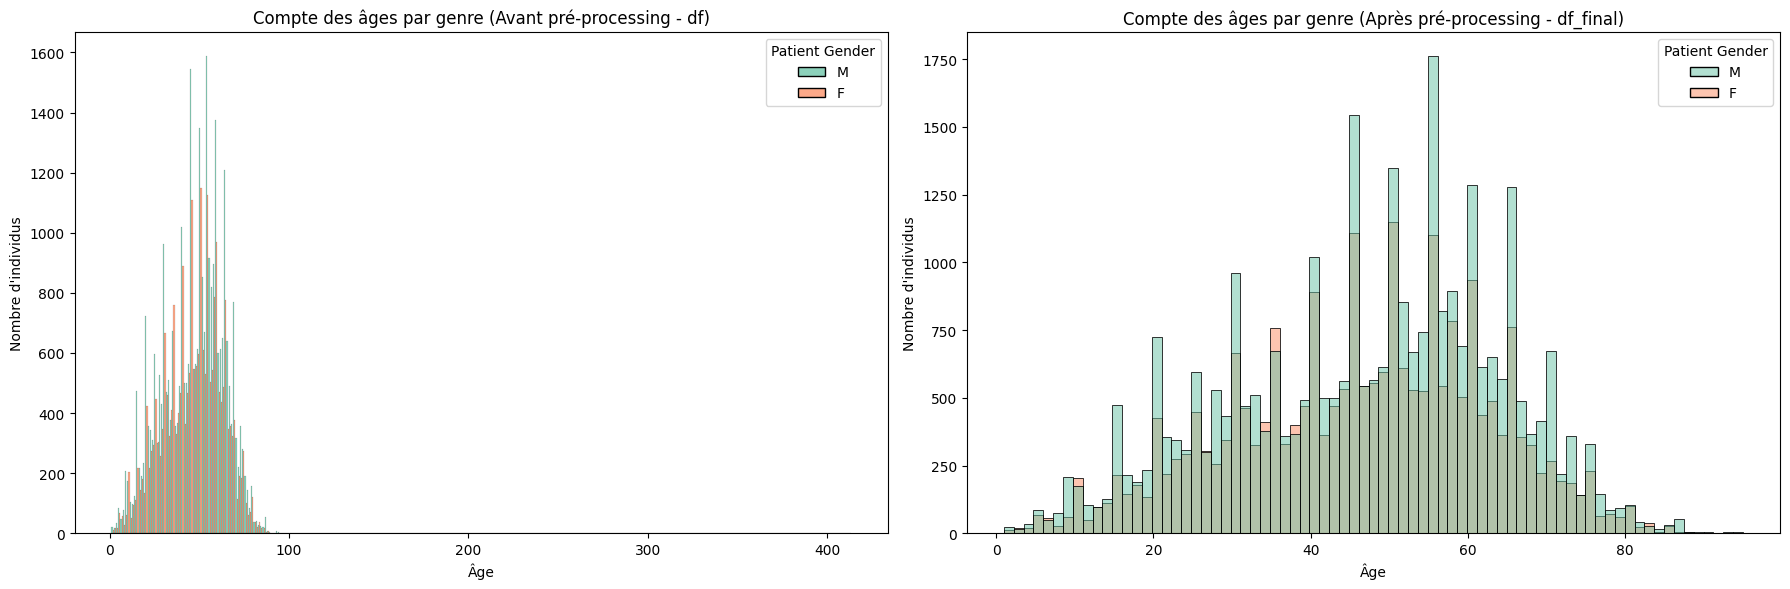

In [43]:
# Créer une figure avec deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 1. Premier graphique : Compte des âges par genre avant pré-processing (df)
sns.histplot(data=df, x='Patient Age', hue='Patient Gender', multiple='dodge', kde=False, ax=axes[0], palette="Set2")
axes[0].set_title("Compte des âges par genre (Avant pré-processing - df)")
axes[0].set_xlabel("Âge")
axes[0].set_ylabel("Nombre d'individus")

# 2. Deuxième graphique : Compte des âges par genre après pré-processing (df_final)
sns.histplot(data=df_final, x='Patient Age', hue='Patient Gender', multiple='layer', kde=False, ax=axes[1], palette="Set2")
axes[1].set_title("Compte des âges par genre (Après pré-processing - df_final)")
axes[1].set_xlabel("Âge")
axes[1].set_ylabel("Nombre d'individus")

# Ajuster l'affichage pour éviter la superposition des légendes
plt.tight_layout()
plt.show()



## 6. Conclusions préliminaires

- **Âge :**  
  Le filtrage des âges > 100 permet d'éliminer des valeurs aberrantes et d'obtenir une distribution plus réaliste des âges.

- **Genre :**  
  La création d'une colonne de poids a été faite avec aif360 d'équilibrer la répartition entre hommes et femmes, réduisant ainsi un biais potentiel dans l'analyse des diagnostics.

- **Diagnostics :**  
  Une analyse plus poussée pourrait être réalisée pour observer l'impact de ces biais sur la distribution des diagnostics et pour corriger d'autres éventuels biais liés aux métadonnées.
  Réduction du biais : Un jeu de données où chaque diagnostic a une fréquence égale peut réduire les biais liés à l'imbalance des classes, notamment dans le cas de modèles ou d'analyses où l'on compare les diagnostics entre eux.  
  Une approche de sous-échantillonnage (ou sur-échantillonnage) pour équilibrer les classes peut être utilisée dans un modèle, mais en visualisation et en analyse, il est préférable de respecter la distribution réelle des données, cependant le chargé de TD m'avait conseillé de ne pas y toucher
  J'ai par ailleurs tout de meme décidé de laisser l'ébauche sur laquelle je travaillais car j'ai jugé que dans le cas d'étude actuel ( domaine médical ), un faux négatif (patient malade mais diagnostiqué comme sain) est largement plus grave qu'un faux positif (patient sain diagnostique malade).

- **View Position :**
	Position de prise de vue : La majorité des images sont prises en position "PA" pour Postero-Apical ou « AP » pour Antero-Postérieur. Il peut être intéressant de vérifier si la position de prise de vue influence la qualité ou l’aspect des images, et s’il y a une interaction avec d’autres variables (diagnostic, sexe, etc.), cependant cette partie sera gérée pour la suite du projet

-	**Dimensions de l’image (Image Width et Image Height) :**
	Plage des dimensions : La largeur varie de 1271 à 3827 pixels, et la hauteur entre 1001 et 4715 pixels.
	PixelSpacing (X et Y) : Ces valeurs sont généralement constantes (environ 0.143 à 0.171), permettant de comprendre l’échelle des images. Elles semblent peu sujettes à des biais liés aux patients.


Les transformations appliquées sont facilement traçables et permettent d'intégrer ce pré-processing dans un pipeline de données ultérieur.